In [16]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


## Import library

In [17]:
pip install pandas-datareader==0.10.0

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install pypfopt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pypfopt (from versions: none)
ERROR: No matching distribution found for pypfopt


In [22]:
pip install ta

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats

# Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



# Financial data 
import ta
import yfinance as yf

# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Enabling Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Datetime and hiding warnings 
import datetime 
import warnings
warnings.filterwarnings("ignore")

## Load data 

In [25]:
import yfinance as yf

# Danh sách các mã chứng khoán của các công ty công nghệ hàng đầu
symbols = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'BABA', 'TCEHY', 'SSNLF', 'NVDA', 'INTC', 'TSM', 'ADBE', 'ORCL', 'CRM', 'NFLX', 'PYPL', 'TSLA', 'IBM', 'CSCO']

# Tải dữ liệu từ Yahoo Finance
df= yf.download(symbols, start="2018-01-01", end="2024-03-06")

print(data)


[*********************100%%**********************]  18 of 18 completed

<module 'pandas_datareader.data' from 'C:\\Users\\Admin\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\pandas_datareader\\data.py'>


In [26]:
import datetime
start_time = datetime.datetime(2018, 1, 1) # 2009-12-31
end_time = datetime.datetime(2024, 3, 6) # 2021-12-31

In [27]:
# dataframe for Adj Close price
act_adj_close_df = pd.DataFrame(index=df.index, columns=symbols)
for ticker in symbols:
    stock_price_df = yf.download(ticker, start_time,end_time)
    stock_price_df.index = pd.to_datetime(stock_price_df.index)
    act_adj_close_df[ticker] = stock_price_df['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

In [28]:
act_adj_close_df

,AAPL,MSFT,GOOG,AMZN,BABA,TCEHY,SSNLF,NVDA,INTC,TSM,ADBE,ORCL,CRM,NFLX,PYPL,TSLA,IBM,CSCO
Date,,,,,,,,,,,,,,,,,,
2018-01-02,40.670971,80.080917,53.250000,59.450500,181.213989,50.614231,5.030255e+22,49.310478,39.740646,34.790058,177.699997,42.119236,104.410004,201.070007,73.839996,21.368668,109.547668,32.156818
2018-01-03,40.663891,80.453621,54.124001,60.209999,181.559357,50.883560,5.030255e+22,52.555794,38.391911,35.375248,181.039993,43.094772,105.290001,205.050003,76.750000,21.150000,112.558907,32.413342
2018-01-04,40.852783,81.161705,54.320000,60.479500,183.246689,51.580090,5.030255e+22,52.832825,37.687878,35.188671,183.220001,43.519299,106.680000,205.630005,76.730003,20.974667,114.838638,32.505047
2018-01-05,41.317902,82.167953,55.111500,61.457001,188.170486,51.886559,5.030255e+22,53.280552,37.950821,36.011349,185.339996,43.781250,108.099998,209.990005,78.699997,21.105333,115.399719,32.955235
2018-01-08,41.164433,82.251816,55.347000,62.343498,187.805389,52.443779,5.030255e+22,54.913097,37.950821,35.994389,185.039993,44.241905,108.860001,212.050003,79.050003,22.427334,116.095673,33.297035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-28,181.419998,407.720001,137.429993,173.160004,74.589996,34.980000,4.059990e+01,776.593567,41.990002,127.379997,551.820007,111.680000,299.769989,596.479980,60.250000,202.039993,185.300003,48.060001
2024-02-29,180.750000,413.640015,139.779999,176.759995,74.029999,34.939999,4.059990e+01,791.082886,43.049999,128.669998,560.280029,111.680000,308.820007,602.919983,60.340000,201.880005,185.029999,48.369999
2024-03-01,179.660004,415.500000,138.080002,178.220001,74.620003,35.270000,4.059990e+01,822.751404,43.820000,133.899994,570.929993,113.779999,316.880005,619.340027,60.540001,202.639999,188.199997,48.400002


#### Export to csv file

In [29]:
act_adj_close_df.to_csv('C:/Users/Admin/Portfolioi Management/dataset.csv', index=False)


#### Data cleaning

In [30]:
# Check null
missing_data = act_adj_close_df.isnull().sum()
print(missing_data)

AAPL     0
MSFT     0
GOOG     0
AMZN     0
BABA     0
TCEHY    0
SSNLF    0
NVDA     0
INTC     0
TSM      0
ADBE     0
ORCL     0
CRM      0
NFLX     0
PYPL     0
TSLA     0
IBM      0
CSCO     0
dtype: int64


In [31]:
# Check if there is negative values in data
is_negative = (act_adj_close_df < 0).any().any()

if is_negative:
    print("We have negative values in DataFrame.")
else:
    print("No We don't have negative values in DataFrame.")


We have negative values in DataFrame.


In [32]:
# Handle the negative values
act_adj_close_df_cleaned = act_adj_close_df.mask(act_adj_close_df < 0)

act_adj_close_df_cleaned = act_adj_close_df_cleaned.dropna()

print(act_adj_close_df_cleaned)


                  AAPL        MSFT        GOOG        AMZN        BABA  \
Date                                                                     
2018-01-02   40.670971   80.080917   53.250000   59.450500  181.213989   
2018-01-03   40.663891   80.453621   54.124001   60.209999  181.559357   
2018-01-04   40.852783   81.161705   54.320000   60.479500  183.246689   
2018-01-05   41.317902   82.167953   55.111500   61.457001  188.170486   
2018-01-08   41.164433   82.251816   55.347000   62.343498  187.805389   
...                ...         ...         ...         ...         ...   
2024-02-28  181.419998  407.720001  137.429993  173.160004   74.589996   
2024-02-29  180.750000  413.640015  139.779999  176.759995   74.029999   
2024-03-01  179.660004  415.500000  138.080002  178.220001   74.620003   
2024-03-04  175.100006  414.920013  134.199997  177.580002   72.000000   
2024-03-05  170.119995  402.649994  133.779999  174.119995   72.070000   

                TCEHY         SSNLF  

In [33]:
# Check if there is negative values in data
is_negative = (act_adj_close_df_cleaned < 0).any().any()

if is_negative:
    print("We have negative values in DataFrame.")
else:
    print("No We don't have negative values in DataFrame.")


No We don't have negative values in DataFrame.


In [38]:
df1 = act_adj_close_df

In [39]:
df1

,AAPL,MSFT,GOOG,AMZN,BABA,TCEHY,SSNLF,NVDA,INTC,TSM,ADBE,ORCL,CRM,NFLX,PYPL,TSLA,IBM,CSCO
Date,,,,,,,,,,,,,,,,,,
2018-01-02,40.670971,80.080917,53.250000,59.450500,181.213989,50.614231,5.030255e+22,49.310478,39.740646,34.790058,177.699997,42.119236,104.410004,201.070007,73.839996,21.368668,109.547668,32.156818
2018-01-03,40.663891,80.453621,54.124001,60.209999,181.559357,50.883560,5.030255e+22,52.555794,38.391911,35.375248,181.039993,43.094772,105.290001,205.050003,76.750000,21.150000,112.558907,32.413342
2018-01-04,40.852783,81.161705,54.320000,60.479500,183.246689,51.580090,5.030255e+22,52.832825,37.687878,35.188671,183.220001,43.519299,106.680000,205.630005,76.730003,20.974667,114.838638,32.505047
2018-01-05,41.317902,82.167953,55.111500,61.457001,188.170486,51.886559,5.030255e+22,53.280552,37.950821,36.011349,185.339996,43.781250,108.099998,209.990005,78.699997,21.105333,115.399719,32.955235
2018-01-08,41.164433,82.251816,55.347000,62.343498,187.805389,52.443779,5.030255e+22,54.913097,37.950821,35.994389,185.039993,44.241905,108.860001,212.050003,79.050003,22.427334,116.095673,33.297035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-28,181.419998,407.720001,137.429993,173.160004,74.589996,34.980000,4.059990e+01,776.593567,41.990002,127.379997,551.820007,111.680000,299.769989,596.479980,60.250000,202.039993,185.300003,48.060001
2024-02-29,180.750000,413.640015,139.779999,176.759995,74.029999,34.939999,4.059990e+01,791.082886,43.049999,128.669998,560.280029,111.680000,308.820007,602.919983,60.340000,201.880005,185.029999,48.369999
2024-03-01,179.660004,415.500000,138.080002,178.220001,74.620003,35.270000,4.059990e+01,822.751404,43.820000,133.899994,570.929993,113.779999,316.880005,619.340027,60.540001,202.639999,188.199997,48.400002


#### Configuration

In [36]:
# plotting parameters
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 12})

#### EDA

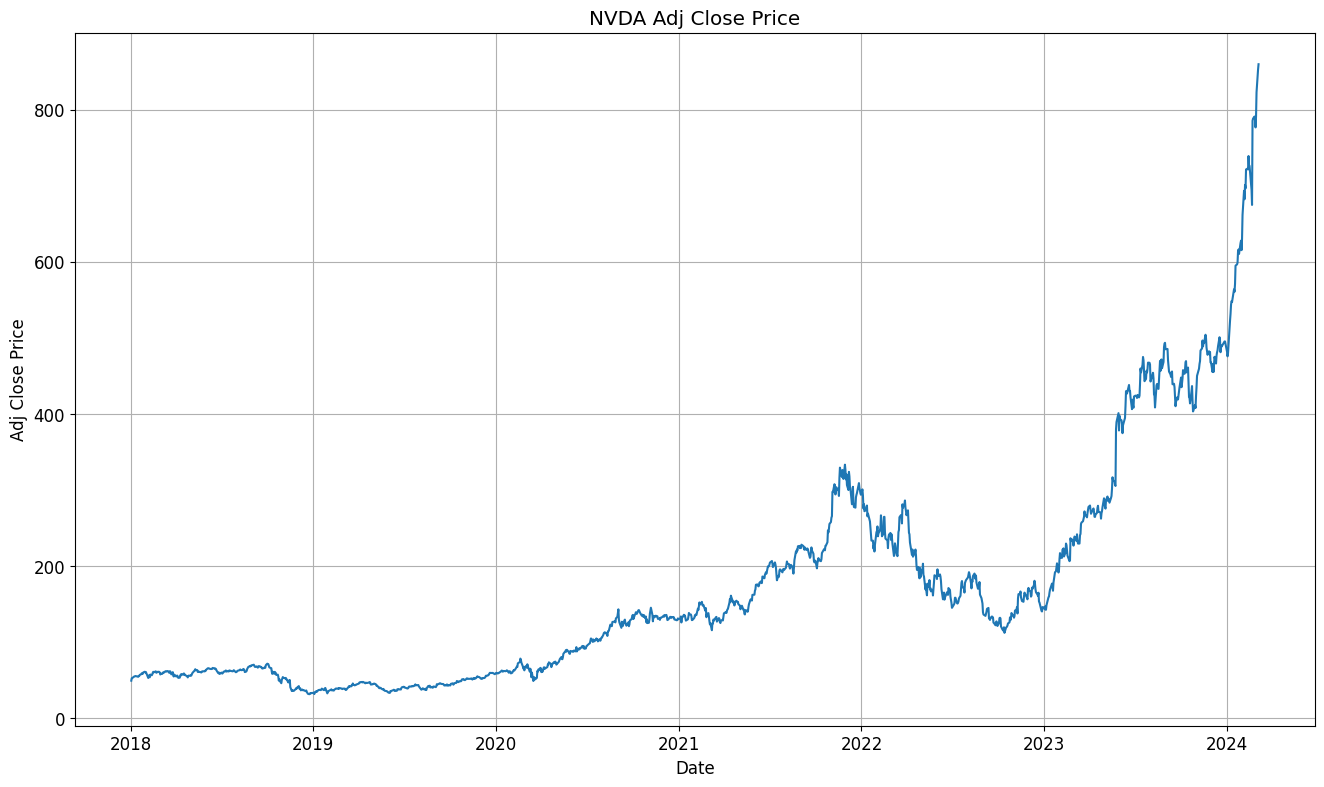

In [40]:
import random
# plotting Adj Close price distribution of random ticker
rand_ticker = random.choice(symbols)
plt.plot(act_adj_close_df[rand_ticker].index, act_adj_close_df[rand_ticker])
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title(f'{rand_ticker} Adj Close Price')
plt.show()

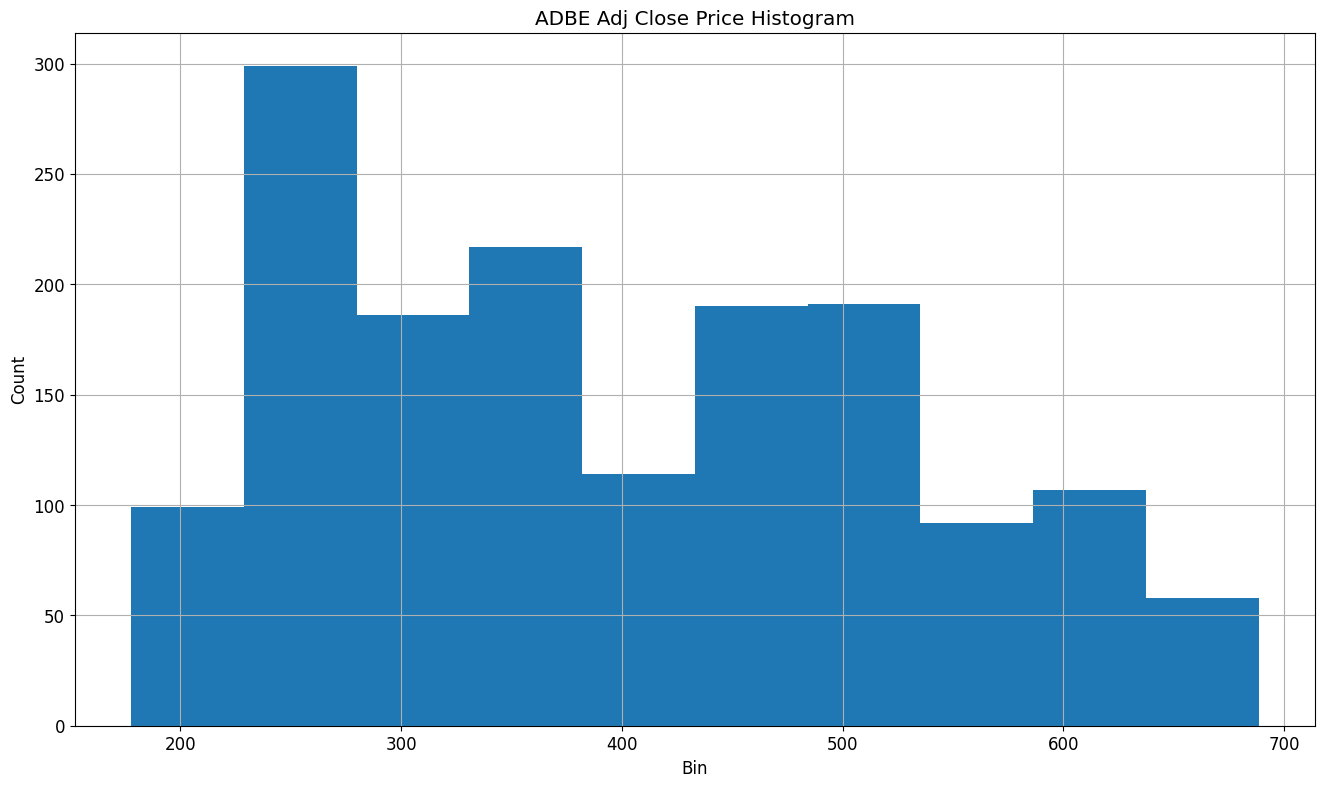

In [ ]:
# histogram
plt.hist(act_adj_close_df[rand_ticker])
plt.xlabel('Bin')
plt.ylabel('Count')
plt.title(f'{rand_ticker} Adj Close Price Histogram')
plt.show()

#### Tạo báo cáo tùy chỉnh


In [48]:
def create_financial_statement(df):
    # Tính lợi nhuận
    df['Profit'] = df['Revenue'] - df['Expense']

    # Tính D/E (tỷ lệ nợ/vốn chủ sở hữu)
    df['D/E'] = df['Debt'] / df['Equity']

    # Tính ROA (tỉ lệ sinh lợi trên tài sản)
    df['ROA'] = df['Profit'] / df['Total Assets']

    # Tính ROE (tỉ lệ sinh lợi trên vốn chủ sở hữu)
    df['ROE'] = df['Profit'] / df['Equity']

    # Tính thêm một số chỉ số liên quan đến hiệu suất
    # Ví dụ: chỉ số tỷ lệ sinh lợi trên vốn sở hữu
    df['Return on Invested Capital (ROIC)'] = (df['Profit'] / (df['Debt'] + df['Equity'])) * 100

    # Tính thêm các chỉ số khác tùy thuộc vào nhu cầu cụ thể của bạn

    return df


#### Daily returns

[*********************100%%**********************]  4 of 4 completed


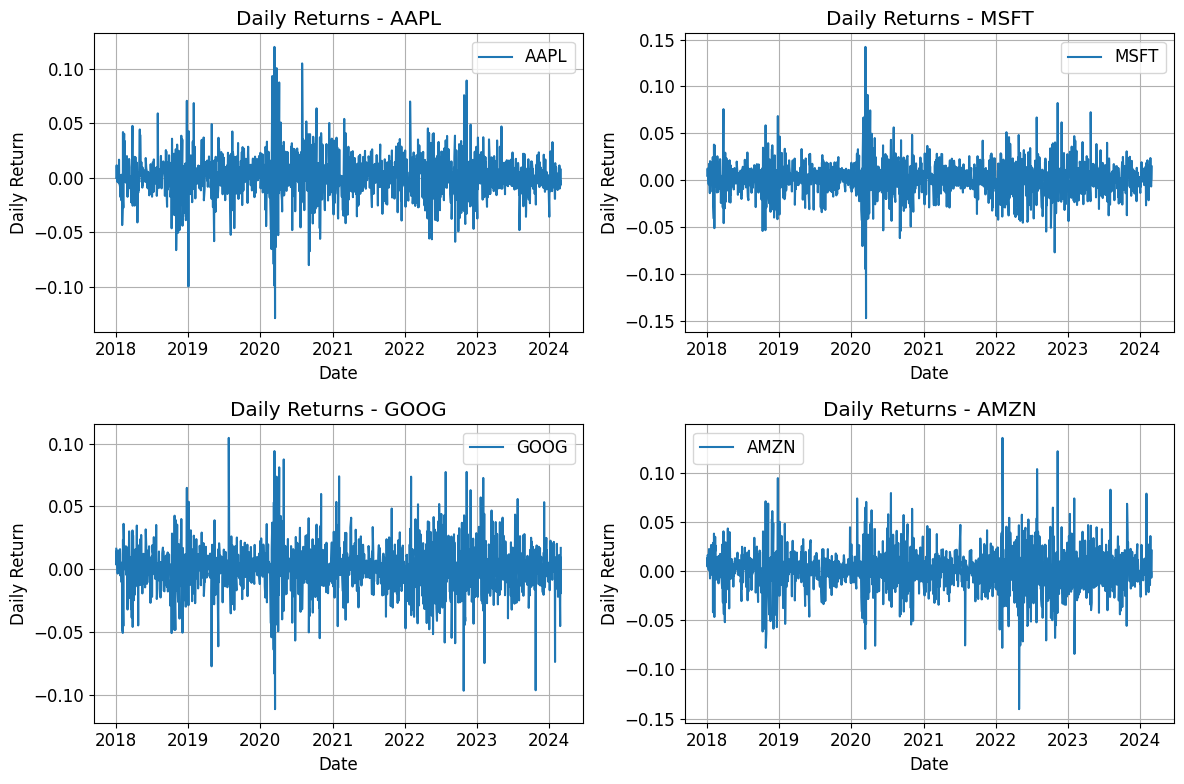

In [47]:
# caculate 4 tech companies to see their daily returns

# Chọn các cổ phiếu cần theo dõi
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN']

# Tải dữ liệu của các cổ phiếu từ Yahoo Finance
data = yf.download(tickers, start='2018-01-01', end='2024-03-01')['Adj Close']

# Tính toán lợi nhuận hàng ngày
daily_returns = data.pct_change()

# Tạo 4 hình riêng biệt
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Vẽ biểu đồ lợi nhuận hàng ngày của từng cổ phiếu
axes[0, 0].plot(daily_returns.index, daily_returns['AAPL'], label='AAPL')
axes[0, 0].set_title('Daily Returns - AAPL')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Daily Return')
axes[0, 0].legend()

axes[0, 1].plot(daily_returns.index, daily_returns['MSFT'], label='MSFT')
axes[0, 1].set_title('Daily Returns - MSFT')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Daily Return')
axes[0, 1].legend()

axes[1, 0].plot(daily_returns.index, daily_returns['GOOG'], label='GOOG')
axes[1, 0].set_title('Daily Returns - GOOG')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Daily Return')
axes[1, 0].legend()

axes[1, 1].plot(daily_returns.index, daily_returns['AMZN'], label='AMZN')
axes[1, 1].set_title('Daily Returns - AMZN')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Daily Return')
axes[1, 1].legend()

# Chỉnh layout của các hình
plt.tight_layout()
plt.show()


## Cumulative Returns

In [ ]:
# Chọn các cổ phiếu cần theo dõi
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'BABA', 'NVDA']

# Tải dữ liệu của các cổ phiếu từ Yahoo Finance
data = yf.download(tickers, start='2018-01-01', end='2024-03-01')['Adj Close']


# Tạo 4 hình riêng biệt
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
# Công thức tính lợi nhuận tích lũy
cumulative_returns = (data / data.iloc[0] - 1) * 100
# Vẽ biểu đồ lợi nhuận hàng ngày của từng cổ phiếu
axes[0, 0].plot(daily_returns.index, daily_returns['AAPL'], label='AAPL')
axes[0, 0].set_title('Cumulative returns - AAPL')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Daily Return')
axes[0, 0].legend()

axes[0, 1].plot(daily_returns.index, daily_returns['MSFT'], label='MSFT')
axes[0, 1].set_title('Cumulative returns- MSFT')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Daily Return')
axes[0, 1].legend()

axes[1, 0].plot(daily_returns.index, daily_returns['GOOG'], label='GOOG')
axes[1, 0].set_title('Cumulative returns - GOOG')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Daily Return')
axes[1, 0].legend()

axes[1, 1].plot(daily_returns.index, daily_returns['AMZN'], label='AMZN')
axes[1, 1].set_title('Cumulative returns - AMZN')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Daily Return')
axes[1, 1].legend()

# Chỉnh layout của các hình
plt.tight_layout()
plt.show()